In [1]:
import imp
import sys
sys.path.insert(0,"/home/ljw/Dropbox/dev/libpysal3")
import libpysal as lp
import geopandas as gpd
import numpy as np
from bounder import region
from bounder.region.abstracts import Constraint
from bounder.region.methods import AZP
from bounder.region import utils as rut
imp.reload(region)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
south = gpd.read_file('/home/ljw/Dropbox/dev/pysal/pysal/examples/south/south.shp').query('STATE_NAME == "Texas"')
south.index = np.arange(len(south))
W_start = lp.weights.Contiguity.Rook.from_dataframe(south)
south.crs = {'init':'epsg:4269'}
south = south.to_crs(epsg=5070)
W_fin = lp.weights.Contiguity.Rook.from_dataframe(south)
np.testing.assert_allclose(W_start.sparse.toarray(), W_fin.sparse.toarray())

In [3]:
from bounder.region.abstracts import Constraint

In [4]:
AZP_ = region.methods.AZP(objective=dict(GI89 = lambda x: x.var()), 
                          constraints=Constraint(FH90 = lambda x: x.count()).above(30),
                          remember=True)
AZP_.add_data(south)

In [5]:
AZP_._log = lambda x: x

In [6]:
pts = pd.DataFrame(lp.weights.util.get_points_array(south.geometry))
pts.index = south.index
AZP_.initialize(5, data=pts, w=W_fin)

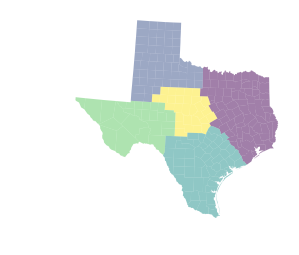

In [7]:
AZP_.plot()
plt.show()

(<matplotlib.figure.Figure at 0x7f7b542747b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b14d75518>)

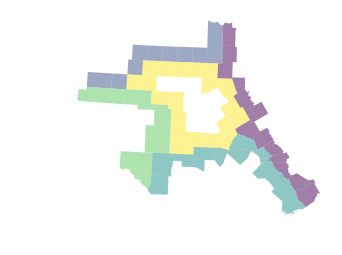

In [8]:
AZP_.plot_boundary()

In [9]:
AZP_._data.groupby('current_labels').count()

,BLK60,BLK70,BLK80,BLK90,CNTY_FIPS,COFIPS,DNL60,DNL70,DNL80,DNL90,...,STATE_FIPS,STATE_NAME,STFIPS,UE60,UE70,UE80,UE90,geometry,0,1
current_labels,,,,,,,,,,,,,,,,,,,,,
0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
1,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
3,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
4,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [10]:
AZP_.refine(rounds=10, progressbar = True)

  0%|          | 0/50 [00:00<?, ?it/s]

starting passes
starting passes
refining 0
[array([36, 35]), array([36, 47]), array([54, 47]), array([54, 62]), array([ 75, 102]), array([ 75, 107]), array([75, 87]), array([75, 62]), array([ 97, 107]), array([112, 107]), array([115, 107]), array([115, 139]), array([115, 127]), array([135, 139]), array([159, 139]), array([159, 171]), array([159, 175]), array([159, 155]), array([163, 175]), array([163, 186]), array([178, 186]), array([192, 200]), array([192, 186]), array([203, 200]), array([203, 207]), array([203, 216]), array([211, 216]), array([219, 225]), array([219, 216])]
considering 36 (0) -> 35 (1)
(0.0051812798697484239, 0.0051822186119497666, 6, 6)
considering 36 (0) -> 47 (1)
(0.0051812798697484239, 0.0051822186119497666, 6, 6)
considering 54 (0) -> 47 (1)
(0.0051750566209398932, 0.0051822186119497666, 6, 6)
considering 54 (0) -> 62 (1)
(0.0051750566209398932, 0.0051822186119497666, 6, 6)
considering 75 (0) -> 102 (4)
(0.0051830681760477188, 0.0051822186119497666, 5, 6)
slack 

  2%|▏         | 1/50 [00:00<00:21,  2.29it/s]

(0.0052503192035336628, 0.0051822186119497666, 6, 6)
obj reduction 6.810059158389621e-05
considering 219 (0) -> 225 (2)
(0.0052355861424677142, 0.0051822186119497666, 6, 6)
obj reduction 5.3367530517947626e-05
considering 219 (0) -> 216 (2)
(0.0052355861424677142, 0.0051822186119497666, 6, 6)
obj reduction 5.3367530517947626e-05
starting passes
refining 1
[array([35, 36]), array([47, 36]), array([47, 54]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([62, 75]), array([62, 54]), array([62, 87]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([104, 100]), array([104, 119]), array([104, 118]), array([105, 119]), array([105, 121]), array([105, 122])]
considering 35 (1) -> 36 (0)
(0.0052577717604930909, 0.0052503192035336628, 6, 6)
obj reduction 7.452556959428036e-06
considering 47 (1) -> 36 (0)
(0.0052535922215094519, 0.0052503192035336628, 6, 6)
obj reduction 3.2730179757890776e-06

  4%|▍         | 2/50 [00:00<00:19,  2.44it/s]


considering 64 (1) -> 82 (4)
(0.0052755491040685438, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 64 (1) -> 83 (4)
(0.0052755491040685438, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 66 (1) -> 84 (4)
(0.0052503463814249822, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 85 (1) -> 100 (4)
(0.0052453609007280756, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 85 (1) -> 84 (4)
(0.0052453609007280756, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 104 (1) -> 100 (4)
(0.0052444762621986349, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 104 (1) -> 119 (3)
(0.0051805429598650908, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 104 (1) -> 118 (3)
(0.0051805429598650908, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 105 (1) -> 119 (3)
(0.0052142376056452128, 0.0052503192035336628, 5, 6)
slack reduction [5 6]
5 5
considering 105 (1

  6%|▌         | 3/50 [00:01<00:19,  2.46it/s]

obj reduction 9.044529367939827e-06
considering 207 (2) -> 203 (0)
(0.0052664527434098437, 0.0052505409556440792, 5, 5)
obj reduction 1.5911787765764476e-05
considering 211 (2) -> 197 (0)
(0.005182440364060183, 0.0052505409556440792, 5, 5)
considering 211 (2) -> 201 (0)
(0.005182440364060183, 0.0052505409556440792, 5, 5)
considering 211 (2) -> 203 (0)
(0.005182440364060183, 0.0052505409556440792, 5, 5)
considering 211 (2) -> 219 (0)
(0.005182440364060183, 0.0052505409556440792, 5, 5)
considering 216 (2) -> 203 (0)
(0.0052701328931925046, 0.0052505409556440792, 5, 5)
considering 216 (2) -> 219 (0)
(0.0052701328931925046, 0.0052505409556440792, 5, 5)
considering 218 (2) -> 195 (3)
(0.0052021456856619821, 0.0052505409556440792, 4, 5)
slack reduction [4 5]
4 5
considering 225 (2) -> 219 (0)
(0.0052646092327631351, 0.0052505409556440792, 5, 5)
obj reduction 1.4068277119055894e-05
starting passes
refining 3
[array([117, 100]), array([117, 101]), array([117, 120]), array([118, 100]), array([1

  8%|▊         | 4/50 [00:01<00:16,  2.73it/s]

considering 118 (3) -> 104 (1)
(0.0053405402126149304, 0.0052646092327631351, 6, 5)
obj reduction 7.593097985179528e-05
considering 119 (3) -> 104 (1)
(0.0053285000176455481, 0.0052646092327631351, 6, 5)
obj reduction 6.389078488241301e-05
considering 119 (3) -> 105 (1)
(0.0053285000176455481, 0.0052646092327631351, 6, 5)
obj reduction 6.389078488241301e-05
considering 121 (3) -> 105 (1)
(0.0052818735558042198, 0.0052646092327631351, 6, 5)
obj reduction 1.7264323041084675e-05
considering 122 (3) -> 105 (1)
(0.0053398588202181428, 0.0052646092327631351, 6, 5)
obj reduction 7.52495874550077e-05
considering 140 (3) -> 149 (4)
(0.0053332689055763305, 0.0052646092327631351, 6, 5)
obj reduction 6.865967281319534e-05
considering 140 (3) -> 120 (4)
(0.0053332689055763305, 0.0052646092327631351, 6, 5)
obj reduction 6.865967281319534e-05
considering 140 (3) -> 123 (4)
(0.0053332689055763305, 0.0052646092327631351, 6, 5)
obj reduction 6.865967281319534e-05
considering 166 (3) -> 167 (4)
(0.005334

 10%|█         | 5/50 [00:02<00:20,  2.20it/s]

(0.00533776550668411, 0.0053405402126149304, 7, 6)
considering 171 (4) -> 184 (2)
(0.00533776550668411, 0.0053405402126149304, 7, 6)
considering 171 (4) -> 189 (2)
(0.00533776550668411, 0.0053405402126149304, 7, 6)
considering 171 (4) -> 159 (0)
(0.0053518754669030725, 0.0053405402126149304, 7, 6)
obj reduction 1.1335254288142096e-05
considering 173 (4) -> 188 (2)
(0.0053381090482639785, 0.0053405402126149304, 7, 6)
considering 174 (4) -> 188 (2)
(0.0053382945254158822, 0.0053405402126149304, 7, 6)
considering 174 (4) -> 189 (2)
(0.0053382945254158822, 0.0053405402126149304, 7, 6)
considering 179 (4) -> 194 (2)
(0.0053102277271741558, 0.0053405402126149304, 7, 6)
considering 179 (4) -> 196 (2)
(0.0053102277271741558, 0.0053405402126149304, 7, 6)
considering 179 (4) -> 166 (3)
(0.0052726395055123611, 0.0053405402126149304, 6, 6)
considering 179 (4) -> 180 (3)
(0.0052726395055123611, 0.0053405402126149304, 6, 6)
considering 179 (4) -> 188 (2)
(0.0053102277271741558, 0.0053405402126149304

 12%|█▏        | 6/50 [00:02<00:21,  2.04it/s]

considering 203 (0) -> 216 (2)
(0.0053501408268478278, 0.0053522089100270145, 7, 7)
considering 219 (0) -> 211 (2)
(0.0053989782784867116, 0.0053522089100270145, 7, 7)
considering 219 (0) -> 216 (2)
(0.0053989782784867116, 0.0053522089100270145, 7, 7)
considering 225 (0) -> 216 (2)
(0.00533804782198871, 0.0053522089100270145, 7, 7)
considering 225 (0) -> 238 (2)
(0.00533804782198871, 0.0053522089100270145, 7, 7)
considering 225 (0) -> 223 (2)
(0.00533804782198871, 0.0053522089100270145, 7, 7)
starting passes
refining 1
[array([35, 36]), array([47, 36]), array([47, 54]), array([47, 62]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([104, 100]), array([104, 119]), array([105, 119]), array([105, 121]), array([105, 122]), array([118, 100]), array([118, 145]), array([118, 117]), array([118, 119])]
considering 35 (1) -> 36 (0)


 14%|█▍        | 7/50 [00:03<00:19,  2.16it/s]


slack reduction [6 7]
6 6
considering 61 (1) -> 81 (4)
(0.0053496219615189137, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 61 (1) -> 87 (4)
(0.0053496219615189137, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 61 (1) -> 62 (4)
(0.0053496219615189137, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 63 (1) -> 83 (4)
(0.005359505405531431, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 63 (1) -> 84 (4)
(0.005359505405531431, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 64 (1) -> 82 (4)
(0.0053785527816628646, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 64 (1) -> 83 (4)
(0.0053785527816628646, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 66 (1) -> 84 (4)
(0.0053540703959401919, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
considering 85 (1) -> 100 (4)
(0.0053494062292547542, 0.0053540973608669001, 6, 7)
slack reduction [6 7]
6 6
co

 16%|█▌        | 8/50 [00:03<00:19,  2.14it/s]


obj reduction 2.0180230303271096e-06
starting passes
refining 3
[array([117, 100]), array([117, 101]), array([117, 118]), array([117, 120]), array([119, 104]), array([119, 105]), array([119, 118]), array([121, 105]), array([122, 105]), array([140, 149]), array([140, 120]), array([140, 123]), array([145, 118]), array([166, 167]), array([166, 179]), array([180, 194]), array([180, 179]), array([195, 194]), array([195, 218])]
considering 117 (3) -> 100 (4)
(0.0054877246768875766, 0.0054127290896790678, 7, 6)
obj reduction 7.499558720850882e-05
considering 117 (3) -> 101 (4)
(0.0054877246768875766, 0.0054127290896790678, 7, 6)
obj reduction 7.499558720850882e-05
considering 117 (3) -> 118 (1)
(0.0054844629614390237, 0.0054127290896790678, 7, 6)
obj reduction 7.173387175995593e-05
considering 117 (3) -> 120 (4)
(0.0054877246768875766, 0.0054127290896790678, 7, 6)
obj reduction 7.499558720850882e-05
considering 119 (3) -> 104 (1)
(0.0054847984655578986, 0.0054127290896790678, 7, 6)
obj reduc

 18%|█▊        | 9/50 [00:03<00:16,  2.43it/s]

(0.0053568455813703762, 0.0054127290896790678, 7, 6)
considering 166 (3) -> 167 (4)
(0.0054894985219912746, 0.0054127290896790678, 7, 6)
obj reduction 7.676943231220684e-05
considering 166 (3) -> 179 (4)
(0.0054894985219912746, 0.0054127290896790678, 7, 6)
obj reduction 7.676943231220684e-05
considering 180 (3) -> 194 (2)
(0.0054647467701816844, 0.0054127290896790678, 7, 6)
obj reduction 5.201768050261662e-05
considering 180 (3) -> 179 (4)
(0.0054856401106106265, 0.0054127290896790678, 7, 6)
obj reduction 7.291102093155873e-05
considering 195 (3) -> 194 (2)
(0.0054191017010000028, 0.0054127290896790678, 7, 6)
obj reduction 6.372611320934994e-06
considering 195 (3) -> 218 (2)
(0.0054191017010000028, 0.0054127290896790678, 7, 6)
obj reduction 6.372611320934994e-06
starting passes
refining 4
[array([47, 35]), array([47, 36]), array([47, 50]), array([47, 54]), array([62, 75]), array([62, 54]), array([62, 61]), array([ 81, 102]), array([81, 60]), array([81, 61]), array([82, 64]), array([82,

 20%|██        | 10/50 [00:04<00:20,  1.93it/s]


(0.0053704799290973017, 0.0054956243377626227, 8, 7)
considering 139 (4) -> 115 (0)
(0.0053704799290973017, 0.0054956243377626227, 8, 7)
considering 139 (4) -> 159 (0)
(0.0053704799290973017, 0.0054956243377626227, 8, 7)
considering 149 (4) -> 140 (3)
(0.0054181179668951942, 0.0054956243377626227, 7, 7)
considering 155 (4) -> 159 (0)
(0.0055025169048013006, 0.0054956243377626227, 8, 7)
obj reduction 6.892567038677827e-06
considering 167 (4) -> 166 (3)
(0.0054251610254251867, 0.0054956243377626227, 7, 7)
considering 171 (4) -> 175 (2)
(0.0054939948093971867, 0.0054956243377626227, 8, 7)
considering 171 (4) -> 184 (2)
(0.0054939948093971867, 0.0054956243377626227, 8, 7)
considering 171 (4) -> 189 (2)
(0.0054939948093971867, 0.0054956243377626227, 8, 7)
considering 171 (4) -> 159 (0)
(0.0055086475327897205, 0.0054956243377626227, 8, 7)
obj reduction 1.3023195027097798e-05
considering 173 (4) -> 188 (2)
(0.0054943991735356325, 0.0054956243377626227, 8, 7)
considering 174 (4) -> 188 (2)
(0

 22%|██▏       | 11/50 [00:05<00:22,  1.72it/s]

(0.0054841797311894983, 0.0055086475327897205, 8, 8)
considering 225 (0) -> 216 (2)
(0.0054939386794359861, 0.0055086475327897205, 8, 8)
considering 225 (0) -> 238 (2)
(0.0054939386794359861, 0.0055086475327897205, 8, 8)
starting passes
refining 1
[array([35, 36]), array([35, 47]), array([50, 47]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([104, 100]), array([104, 119]), array([105, 119]), array([105, 121]), array([118, 100]), array([118, 145]), array([118, 117]), array([118, 119]), array([122, 141]), array([122, 143]), array([122, 144]), array([122, 119]), array([122, 121])]
considering 35 (1) -> 36 (4)
(0.0055518409006640474, 0.005547464777365502, 7, 7)
obj reduction 4.376123298545365e-06
considering 35 (1) -> 47 (4)
(0.0055518409006640474, 0.005547464777365502, 7, 7)
obj reduction 4.376123298545365e-06
considering 5

 24%|██▍       | 12/50 [00:05<00:20,  1.89it/s]


(0.0055617994602970445, 0.005547464777365502, 7, 7)
obj reduction 1.4334682931542442e-05
considering 66 (1) -> 84 (4)
(0.0055434784889616283, 0.005547464777365502, 7, 7)
considering 85 (1) -> 100 (4)
(0.0055411282981856743, 0.005547464777365502, 7, 7)
considering 85 (1) -> 84 (4)
(0.0055411282981856743, 0.005547464777365502, 7, 7)
considering 104 (1) -> 100 (4)
(0.0055411781297316229, 0.005547464777365502, 7, 7)
considering 104 (1) -> 119 (3)
(0.0054638449380309696, 0.005547464777365502, 6, 7)
considering 105 (1) -> 119 (3)
(0.0054976714151815185, 0.005547464777365502, 6, 7)
considering 105 (1) -> 121 (3)
(0.0054976714151815185, 0.005547464777365502, 6, 7)
considering 118 (1) -> 100 (4)
(0.0055412599084885342, 0.005547464777365502, 7, 7)
considering 118 (1) -> 145 (3)
(0.005463957249163617, 0.005547464777365502, 6, 7)
slack reduction [6 7]
6 7
considering 118 (1) -> 117 (3)
(0.005463957249163617, 0.005547464777365502, 6, 7)
slack reduction [6 7]
6 6
considering 118 (1) -> 119 (3)
(0.0

 26%|██▌       | 13/50 [00:06<00:19,  1.91it/s]

(0.0054845162524378502, 0.005463957249163617, 6, 6)
considering 218 (2) -> 195 (3)
(0.0054100100605817946, 0.005463957249163617, 5, 6)
slack reduction [5 6]
5 6
considering 227 (2) -> 223 (0)
(0.0054706945158885315, 0.005463957249163617, 6, 6)
obj reduction 6.73726672491444e-06
considering 238 (2) -> 225 (0)
(0.005466915193365748, 0.005463957249163617, 6, 6)
obj reduction 2.9579442021310243e-06
considering 238 (2) -> 223 (0)
(0.005466915193365748, 0.005463957249163617, 6, 6)
obj reduction 2.9579442021310243e-06
starting passes
refining 3
[array([117, 100]), array([117, 101]), array([117, 120]), array([118, 100]), array([118, 104]), array([119, 104]), array([119, 105]), array([119, 122]), array([121, 105]), array([121, 122]), array([140, 149]), array([140, 120]), array([140, 123]), array([141, 122]), array([143, 122]), array([144, 122]), array([166, 167]), array([166, 179]), array([180, 194]), array([180, 179]), array([195, 194]), array([195, 218])]
considering 117 (3) -> 100 (4)
(0.005

 28%|██▊       | 14/50 [00:06<00:16,  2.16it/s]


(0.0055425012831858828, 0.0054706945158885315, 7, 6)
obj reduction 7.18067672973513e-05
considering 121 (3) -> 105 (1)
(0.0054936464430303646, 0.0054706945158885315, 7, 6)
obj reduction 2.2951927141833146e-05
considering 121 (3) -> 122 (1)
(0.0054936464430303646, 0.0054706945158885315, 7, 6)
obj reduction 2.2951927141833146e-05
considering 140 (3) -> 149 (4)
(0.0055398600452678127, 0.0054706945158885315, 7, 6)
obj reduction 6.916552937928123e-05
considering 140 (3) -> 120 (4)
(0.0055398600452678127, 0.0054706945158885315, 7, 6)
obj reduction 6.916552937928123e-05
considering 140 (3) -> 123 (4)
(0.0055398600452678127, 0.0054706945158885315, 7, 6)
obj reduction 6.916552937928123e-05
considering 141 (3) -> 122 (1)
(0.005545528612510519, 0.0054706945158885315, 7, 6)
obj reduction 7.48340966219875e-05
considering 143 (3) -> 122 (1)
(0.0054547162559207465, 0.0054706945158885315, 7, 6)
considering 144 (3) -> 122 (1)
(0.005484328868901444, 0.0054706945158885315, 7, 6)
obj reduction 1.36343530

 30%|███       | 15/50 [00:07<00:19,  1.77it/s]


(0.0054724077988500524, 0.0055479971752134486, 6, 7)
slack reduction [6 7]
6 7
considering 179 (4) -> 180 (3)
(0.0054724077988500524, 0.0055479971752134486, 6, 7)
slack reduction [6 7]
6 6
considering 179 (4) -> 188 (2)
(0.0055157809228117017, 0.0055479971752134486, 7, 7)
starting passes
refining 0
[array([37, 36]), array([54, 36]), array([54, 47]), array([54, 62]), array([ 75, 107]), array([75, 87]), array([75, 62]), array([ 97, 107]), array([102, 103]), array([102, 107]), array([102,  81]), array([102, 114]), array([102,  87]), array([102, 125]), array([112, 107]), array([115, 107]), array([115, 139]), array([115, 127]), array([135, 139]), array([159, 139]), array([159, 175]), array([159, 155]), array([163, 175]), array([163, 186]), array([171, 174]), array([171, 175]), array([171, 184]), array([171, 154]), array([171, 155]), array([171, 189]), array([172, 192]), array([177, 192]), array([178, 192]), array([178, 186]), array([197, 192]), array([197, 211]), array([201, 211]), array([

 32%|███▏      | 16/50 [00:08<00:21,  1.61it/s]

(0.0055183536931477858, 0.0054724077988500524, 6, 6)
considering 219 (0) -> 216 (2)
(0.0055183536931477858, 0.0054724077988500524, 6, 6)
considering 223 (0) -> 238 (2)
(0.0054473250349941476, 0.0054724077988500524, 6, 6)
considering 223 (0) -> 207 (2)
(0.0054473250349941476, 0.0054724077988500524, 6, 6)
considering 223 (0) -> 215 (2)
(0.0054473250349941476, 0.0054724077988500524, 6, 6)
considering 223 (0) -> 216 (2)
(0.0054473250349941476, 0.0054724077988500524, 6, 6)
considering 225 (0) -> 216 (2)
(0.0054572257288556993, 0.0054724077988500524, 6, 6)
considering 225 (0) -> 238 (2)
(0.0054572257288556993, 0.0054724077988500524, 6, 6)
considering 227 (0) -> 231 (2)
(0.005465670532125138, 0.0054724077988500524, 6, 6)
considering 227 (0) -> 237 (2)
(0.005465670532125138, 0.0054724077988500524, 6, 6)
considering 227 (0) -> 238 (2)
(0.005465670532125138, 0.0054724077988500524, 6, 6)
considering 227 (0) -> 215 (2)
(0.005465670532125138, 0.0054724077988500524, 6, 6)
considering 227 (0) -> 222 

 34%|███▍      | 17/50 [00:08<00:18,  1.83it/s]

(0.0054311413122434798, 0.0054724077988500524, 5, 6)
considering 122 (1) -> 141 (3)
(0.005396417563593851, 0.0054724077988500524, 5, 6)
slack reduction [5 6]
5 5
considering 122 (1) -> 143 (3)
(0.005396417563593851, 0.0054724077988500524, 5, 6)
slack reduction [5 6]
5 5
considering 122 (1) -> 144 (3)
(0.005396417563593851, 0.0054724077988500524, 5, 6)
slack reduction [5 6]
5 5
considering 122 (1) -> 119 (3)
(0.005396417563593851, 0.0054724077988500524, 5, 6)
slack reduction [5 6]
5 5
considering 122 (1) -> 121 (3)
(0.005396417563593851, 0.0054724077988500524, 5, 6)
slack reduction [5 6]
5 5
starting passes
refining 2
[array([175, 159]), array([175, 163]), array([175, 171]), array([184, 171]), array([186, 163]), array([186, 178]), array([188, 173]), array([188, 174]), array([188, 179]), array([189, 171]), array([189, 174]), array([192, 197]), array([192, 203]), array([192, 172]), array([192, 177]), array([192, 178]), array([194, 195]), array([194, 179]), array([194, 180]), array([196, 1

 36%|███▌      | 18/50 [00:09<00:17,  1.81it/s]

considering 196 (2) -> 179 (3)
(0.0053313539971803162, 0.0053946651816243786, 4, 5)
slack reduction [4 5]
4 4
considering 200 (2) -> 203 (0)
(0.0054056111158577204, 0.0053946651816243786, 5, 5)
obj reduction 1.094593423334178e-05
considering 207 (2) -> 203 (0)
(0.0054123858740801733, 0.0053946651816243786, 5, 5)
considering 207 (2) -> 223 (0)
(0.0054123858740801733, 0.0053946651816243786, 5, 5)
considering 211 (2) -> 197 (0)
(0.0053242161033259221, 0.0053946651816243786, 5, 5)
considering 211 (2) -> 201 (0)
(0.0053242161033259221, 0.0053946651816243786, 5, 5)
considering 211 (2) -> 203 (0)
(0.0053242161033259221, 0.0053946651816243786, 5, 5)
considering 211 (2) -> 219 (0)
(0.0053242161033259221, 0.0053946651816243786, 5, 5)
considering 215 (2) -> 227 (0)
(0.0054050628961925182, 0.0053946651816243786, 5, 5)
obj reduction 1.0397714568139566e-05
considering 215 (2) -> 223 (0)
(0.0054050628961925182, 0.0053946651816243786, 5, 5)
obj reduction 1.0397714568139566e-05
considering 216 (2) -> 2

 38%|███▊      | 19/50 [00:09<00:15,  1.94it/s]

(0.0054029850914869646, 0.0054253662603530334, 6, 5)
considering 144 (3) -> 122 (1)
(0.0054315198196875566, 0.0054253662603530334, 6, 5)
considering 145 (3) -> 118 (4)
(0.0054261531216597218, 0.0054253662603530334, 6, 5)
obj reduction 7.868613066883134e-07
considering 166 (3) -> 167 (4)
(0.0054983497360825235, 0.0054253662603530334, 6, 5)
obj reduction 7.298347572949008e-05
considering 179 (3) -> 194 (2)
(0.0054623124801678972, 0.0054253662603530334, 6, 5)
obj reduction 3.6946219814863734e-05
considering 179 (3) -> 196 (2)
(0.0054623124801678972, 0.0054253662603530334, 6, 5)
obj reduction 3.6946219814863734e-05
considering 179 (3) -> 167 (4)
(0.0054951792820241586, 0.0054253662603530334, 6, 5)
obj reduction 6.981302167112513e-05
considering 179 (3) -> 173 (4)
(0.0054951792820241586, 0.0054253662603530334, 6, 5)
obj reduction 6.981302167112513e-05
considering 179 (3) -> 188 (2)
(0.0054623124801678972, 0.0054253662603530334, 6, 5)
obj reduction 3.6946219814863734e-05
considering 180 (3) 

 40%|████      | 20/50 [00:10<00:18,  1.59it/s]

(0.0055134085848366002, 0.0055031088775787055, 7, 6)
obj reduction 1.0299707257894683e-05
considering 167 (4) -> 166 (3)
(0.0054259808324083779, 0.0055031088775787055, 6, 6)
considering 167 (4) -> 179 (3)
(0.0054259808324083779, 0.0055031088775787055, 6, 6)
considering 173 (4) -> 179 (3)
(0.0054336049702132386, 0.0055031088775787055, 6, 6)
considering 173 (4) -> 188 (2)
(0.0055018796638176643, 0.0055031088775787055, 7, 6)
considering 174 (4) -> 171 (0)
(0.0055172813053736992, 0.0055031088775787055, 7, 6)
obj reduction 1.417242779499367e-05
considering 174 (4) -> 188 (2)
(0.0055021825400527616, 0.0055031088775787055, 7, 6)
considering 174 (4) -> 189 (2)
(0.0055021825400527616, 0.0055031088775787055, 7, 6)
starting passes
refining 0
[array([37, 36]), array([54, 36]), array([54, 47]), array([54, 62]), array([ 75, 107]), array([75, 87]), array([75, 62]), array([ 97, 107]), array([102, 103]), array([102, 107]), array([102,  81]), array([102, 114]), array([102,  87]), array([102, 125]), arra

 42%|████▏     | 21/50 [00:11<00:21,  1.34it/s]

(0.0055095624310034941, 0.0055172813053736992, 7, 7)
considering 227 (0) -> 222 (2)
(0.0055095624310034941, 0.0055172813053736992, 7, 7)
considering 237 (0) -> 231 (2)
(0.0054866966386949538, 0.0055172813053736992, 7, 7)
considering 237 (0) -> 233 (2)
(0.0054866966386949538, 0.0055172813053736992, 7, 7)
considering 237 (0) -> 238 (2)
(0.0054866966386949538, 0.0055172813053736992, 7, 7)
considering 237 (0) -> 240 (2)
(0.0054866966386949538, 0.0055172813053736992, 7, 7)
considering 237 (0) -> 241 (2)
(0.0054866966386949538, 0.0055172813053736992, 7, 7)
starting passes
refining 1
[array([35, 36]), array([35, 47]), array([50, 47]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([104, 100]), array([104, 119]), array([104, 118]), array([105, 119]), array([105, 121]), array([122, 141]), array([122, 143]), array([122, 144]), array(

 44%|████▍     | 22/50 [00:11<00:17,  1.59it/s]


(0.0054984318805614734, 0.005503541485180511, 6, 6)
considering 63 (1) -> 83 (4)
(0.0055042390415981626, 0.005503541485180511, 6, 6)
obj reduction 6.975564176515611e-07
considering 63 (1) -> 84 (4)
(0.0055042390415981626, 0.005503541485180511, 6, 6)
obj reduction 6.975564176515611e-07
considering 64 (1) -> 82 (4)
(0.0055184925851001669, 0.005503541485180511, 6, 6)
obj reduction 1.495109991965591e-05
considering 64 (1) -> 83 (4)
(0.0055184925851001669, 0.005503541485180511, 6, 6)
obj reduction 1.495109991965591e-05
considering 66 (1) -> 84 (4)
(0.0055006509674111409, 0.005503541485180511, 6, 6)
considering 85 (1) -> 100 (4)
(0.0054983836725808989, 0.005503541485180511, 6, 6)
considering 85 (1) -> 84 (4)
(0.0054983836725808989, 0.005503541485180511, 6, 6)
considering 104 (1) -> 100 (4)
(0.0054984438425305102, 0.005503541485180511, 6, 6)
considering 104 (1) -> 118 (4)
(0.0054984438425305102, 0.005503541485180511, 6, 6)
considering 105 (1) -> 119 (3)
(0.0054622749985739402, 0.005503541485

 46%|████▌     | 23/50 [00:12<00:17,  1.58it/s]

(0.0054495474325439094, 0.0054275512499243114, 5, 5)
considering 216 (2) -> 223 (0)
(0.0054495474325439094, 0.0054275512499243114, 5, 5)
considering 218 (2) -> 195 (3)
(0.005379891845196029, 0.0054275512499243114, 4, 5)
slack reduction [4 5]
4 5
considering 222 (2) -> 227 (0)
(0.0054488222959604912, 0.0054275512499243114, 5, 5)
obj reduction 2.1271046036179866e-05
considering 231 (2) -> 227 (0)
(0.005440981388622361, 0.0054275512499243114, 5, 5)
obj reduction 1.3430138698049612e-05
considering 231 (2) -> 237 (0)
(0.005440981388622361, 0.0054275512499243114, 5, 5)
obj reduction 1.3430138698049612e-05
considering 233 (2) -> 237 (0)
(0.0054475041407522819, 0.0054275512499243114, 5, 5)
obj reduction 1.9952890827970582e-05
considering 238 (2) -> 225 (0)
(0.0054314635351865176, 0.0054275512499243114, 5, 5)
obj reduction 3.91228526220623e-06
considering 238 (2) -> 227 (0)
(0.0054314635351865176, 0.0054275512499243114, 5, 5)
obj reduction 3.91228526220623e-06
considering 238 (2) -> 237 (0)
(0.

 48%|████▊     | 24/50 [00:12<00:14,  1.85it/s]

(0.0054839841126481399, 0.0054488222959604912, 6, 5)
obj reduction 3.516181668764863e-05
considering 180 (3) -> 194 (2)
(0.0054948126129439473, 0.0054488222959604912, 6, 5)
obj reduction 4.599031698345607e-05
considering 195 (3) -> 194 (2)
(0.0054541295761212777, 0.0054488222959604912, 6, 5)
obj reduction 5.307280160786465e-06
considering 195 (3) -> 218 (2)
(0.0054541295761212777, 0.0054488222959604912, 6, 5)
obj reduction 5.307280160786465e-06
starting passes
refining 4
[array([36, 35]), array([36, 54]), array([37, 40]), array([37, 54]), array([37, 55]), array([47, 35]), array([47, 50]), array([47, 54]), array([62, 75]), array([62, 54]), array([62, 61]), array([ 81, 102]), array([81, 60]), array([81, 61]), array([82, 64]), array([82, 60]), array([83, 64]), array([83, 63]), array([84, 66]), array([84, 85]), array([84, 63]), array([ 87, 102]), array([87, 75]), array([87, 61]), array([100, 104]), array([100,  85]), array([100, 117]), array([101, 117]), array([103, 102]), array([107,  97]

 50%|█████     | 25/50 [00:13<00:15,  1.57it/s]


5 5
considering 166 (4) -> 150 (3)
(0.0054488222959604912, 0.0055210587949916824, 5, 6)
slack reduction [5 6]
5 5
considering 167 (4) -> 179 (3)
(0.0054505655858500951, 0.0055210587949916824, 5, 6)
considering 173 (4) -> 174 (0)
(0.0055344746641562293, 0.0055210587949916824, 6, 6)
obj reduction 1.3415869164546887e-05
considering 173 (4) -> 179 (3)
(0.0054508886219813649, 0.0055210587949916824, 5, 6)
slack reduction [5 6]
5 6
considering 173 (4) -> 188 (2)
(0.0055181643511080253, 0.0055210587949916824, 6, 6)
starting passes
refining 0
[array([40, 37]), array([54, 36]), array([54, 37]), array([54, 47]), array([54, 62]), array([55, 37]), array([ 75, 107]), array([75, 87]), array([75, 62]), array([ 97, 107]), array([102, 103]), array([102, 107]), array([102,  81]), array([102, 114]), array([102,  87]), array([102, 125]), array([112, 107]), array([115, 107]), array([115, 139]), array([115, 127]), array([135, 139]), array([159, 139]), array([159, 175]), array([159, 155]), array([163, 175]),

 52%|█████▏    | 26/50 [00:14<00:17,  1.38it/s]

(0.0054193995747912789, 0.0054508886219813649, 5, 5)
considering 237 (0) -> 233 (2)
(0.0054193995747912789, 0.0054508886219813649, 5, 5)
considering 237 (0) -> 238 (2)
(0.0054193995747912789, 0.0054508886219813649, 5, 5)
considering 237 (0) -> 240 (2)
(0.0054193995747912789, 0.0054508886219813649, 5, 5)
considering 237 (0) -> 241 (2)
(0.0054193995747912789, 0.0054508886219813649, 5, 5)
starting passes
refining 1
[array([35, 36]), array([35, 47]), array([50, 47]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([104, 100]), array([104, 119]), array([104, 118]), array([105, 119]), array([105, 121]), array([105, 122])]
considering 35 (1) -> 36 (4)
(0.0053807711079997085, 0.0053746805755139852, 4, 4)
obj reduction 6.0905324857233115e-06
considering 35 (1) -> 47 (4)
(0.0053807711079997085, 0.0053746805755139852, 4, 4)
obj reducti

 54%|█████▍    | 27/50 [00:14<00:13,  1.67it/s]

considering 63 (1) -> 84 (4)
(0.0053760062753651292, 0.0053746805755139852, 4, 4)
obj reduction 1.3256998511439883e-06
considering 64 (1) -> 82 (4)
(0.0053907555168079121, 0.0053746805755139852, 4, 4)
obj reduction 1.6074941293926955e-05
considering 64 (1) -> 83 (4)
(0.0053907555168079121, 0.0053746805755139852, 4, 4)
obj reduction 1.6074941293926955e-05
considering 66 (1) -> 84 (4)
(0.00537213503785658, 0.0053746805755139852, 4, 4)
considering 85 (1) -> 100 (4)
(0.0053693845584601224, 0.0053746805755139852, 4, 4)
considering 85 (1) -> 84 (4)
(0.0053693845584601224, 0.0053746805755139852, 4, 4)
considering 104 (1) -> 100 (4)
(0.0053692383847614763, 0.0053746805755139852, 4, 4)
considering 104 (1) -> 118 (4)
(0.0053692383847614763, 0.0053746805755139852, 4, 4)
considering 105 (1) -> 119 (3)
(0.005343102862212918, 0.0053746805755139852, 3, 4)
slack reduction [3 4]
3 4
considering 105 (1) -> 121 (3)
(0.005343102862212918, 0.0053746805755139852, 3, 4)
slack reduction [3 4]
3 3
considering 

 56%|█████▌    | 28/50 [00:15<00:13,  1.60it/s]


considering 218 (2) -> 195 (3)
(0.0053087064679711859, 0.005343102862212918, 2, 3)
slack reduction [2 3]
2 3
considering 226 (2) -> 222 (0)
(0.0053768444211304885, 0.005343102862212918, 3, 3)
obj reduction 3.374155891757054e-05
considering 231 (2) -> 227 (0)
(0.005357257313983052, 0.005343102862212918, 3, 3)
obj reduction 1.4154451770134052e-05
considering 231 (2) -> 237 (0)
(0.005357257313983052, 0.005343102862212918, 3, 3)
obj reduction 1.4154451770134052e-05
considering 231 (2) -> 222 (0)
(0.005357257313983052, 0.005343102862212918, 3, 3)
obj reduction 1.4154451770134052e-05
considering 233 (2) -> 237 (0)
(0.0053638980658268966, 0.005343102862212918, 3, 3)
obj reduction 2.0795203613978644e-05
considering 238 (2) -> 225 (0)
(0.0053475178660697554, 0.005343102862212918, 3, 3)
obj reduction 4.415003856837393e-06
considering 238 (2) -> 227 (0)
(0.0053475178660697554, 0.005343102862212918, 3, 3)
obj reduction 4.415003856837393e-06
considering 238 (2) -> 237 (0)
(0.0053475178660697554, 0

 58%|█████▊    | 29/50 [00:15<00:11,  1.75it/s]

(0.0054315148411187807, 0.0053768444211304885, 4, 3)
considering 174 (3) -> 154 (4)
(0.005435063820959863, 0.0053768444211304885, 4, 3)
obj reduction 5.821939982937445e-05
considering 174 (3) -> 188 (2)
(0.0054317405295801549, 0.0053768444211304885, 4, 3)
obj reduction 5.489610844966637e-05
considering 174 (3) -> 189 (2)
(0.0054317405295801549, 0.0053768444211304885, 4, 3)
obj reduction 5.489610844966637e-05
considering 179 (3) -> 194 (2)
(0.0053983810195606828, 0.0053768444211304885, 4, 3)
considering 179 (3) -> 196 (2)
(0.0053983810195606828, 0.0053768444211304885, 4, 3)
considering 179 (3) -> 167 (4)
(0.0054303529181203621, 0.0053768444211304885, 4, 3)
considering 179 (3) -> 188 (2)
(0.0053983810195606828, 0.0053768444211304885, 4, 3)
considering 180 (3) -> 194 (2)
(0.0054088202064862343, 0.0053768444211304885, 4, 3)
considering 180 (3) -> 166 (4)
(0.0054326833278307719, 0.0053768444211304885, 4, 3)
considering 195 (3) -> 194 (2)
(0.0053703976671608958, 0.0053768444211304885, 4, 3)


 60%|██████    | 30/50 [00:16<00:13,  1.52it/s]


(0.0053748408567710054, 0.005435063820959863, 3, 4)
considering 155 (4) -> 171 (0)
(0.0054436676732200406, 0.005435063820959863, 4, 4)
obj reduction 8.603852260177618e-06
considering 155 (4) -> 159 (0)
(0.0054436676732200406, 0.005435063820959863, 4, 4)
obj reduction 8.603852260177618e-06
considering 166 (4) -> 168 (3)
(0.005375571311481398, 0.005435063820959863, 3, 4)
slack reduction [3 4]
3 4
considering 166 (4) -> 140 (3)
(0.005375571311481398, 0.005435063820959863, 3, 4)
slack reduction [3 4]
3 3
considering 166 (4) -> 179 (3)
(0.005375571311481398, 0.005435063820959863, 3, 4)
slack reduction [3 4]
3 3
considering 166 (4) -> 180 (3)
(0.005375571311481398, 0.005435063820959863, 3, 4)
slack reduction [3 4]
3 3
considering 166 (4) -> 150 (3)
(0.005375571311481398, 0.005435063820959863, 3, 4)
slack reduction [3 4]
3 3
considering 167 (4) -> 173 (3)
(0.0053748976403501288, 0.005435063820959863, 3, 4)
considering 167 (4) -> 179 (3)
(0.0053748976403501288, 0.005435063820959863, 3, 4)
con

 62%|██████▏   | 31/50 [00:17<00:14,  1.34it/s]

(0.0053668953767522908, 0.005375571311481398, 3, 3)
considering 227 (0) -> 238 (2)
(0.0053668953767522908, 0.005375571311481398, 3, 3)
considering 227 (0) -> 215 (2)
(0.0053668953767522908, 0.005375571311481398, 3, 3)
considering 237 (0) -> 231 (2)
(0.0053452555050463183, 0.005375571311481398, 3, 3)
considering 237 (0) -> 233 (2)
(0.0053452555050463183, 0.005375571311481398, 3, 3)
considering 237 (0) -> 238 (2)
(0.0053452555050463183, 0.005375571311481398, 3, 3)
considering 237 (0) -> 240 (2)
(0.0053452555050463183, 0.005375571311481398, 3, 3)
considering 237 (0) -> 241 (2)
(0.0053452555050463183, 0.005375571311481398, 3, 3)
starting passes
refining 1
[array([35, 36]), array([35, 47]), array([50, 47]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([ 88, 105]), array([104, 100]), array([104, 105]), array([104, 119]), array(

 64%|██████▍   | 32/50 [00:18<00:10,  1.66it/s]

(0.0053803564511200252, 0.0053837942120932829, 3, 3)
considering 61 (1) -> 62 (4)
(0.0053803564511200252, 0.0053837942120932829, 3, 3)
considering 63 (1) -> 83 (4)
(0.0053849955040049472, 0.0053837942120932829, 3, 3)
obj reduction 1.201291911664265e-06
considering 63 (1) -> 84 (4)
(0.0053849955040049472, 0.0053837942120932829, 3, 3)
obj reduction 1.201291911664265e-06
considering 64 (1) -> 82 (4)
(0.0053970822911595679, 0.0053837942120932829, 3, 3)
obj reduction 1.3288079066284958e-05
considering 64 (1) -> 83 (4)
(0.0053970822911595679, 0.0053837942120932829, 3, 3)
obj reduction 1.3288079066284958e-05
considering 66 (1) -> 84 (4)
(0.005382038903688869, 0.0053837942120932829, 3, 3)
considering 85 (1) -> 100 (4)
(0.00538033590585257, 0.0053837942120932829, 3, 3)
considering 85 (1) -> 84 (4)
(0.00538033590585257, 0.0053837942120932829, 3, 3)
considering 88 (1) -> 105 (3)
(0.0053272724607909515, 0.0053837942120932829, 2, 3)
slack reduction [2 3]
2 3
considering 104 (1) -> 100 (4)
(0.005380

 66%|██████▌   | 33/50 [00:18<00:10,  1.55it/s]


considering 241 (2) -> 237 (0)
(0.0053568411842410801, 0.0053272724607909515, 2, 2)
starting passes
refining 3
[array([88, 68]), array([88, 69]), array([88, 86]), array([105, 104]), array([117, 100]), array([117, 101]), array([117, 118]), array([117, 120]), array([119, 104]), array([119, 118]), array([140, 149]), array([140, 120]), array([140, 123]), array([145, 118]), array([166, 167]), array([173, 167]), array([173, 174]), array([173, 153]), array([173, 154]), array([173, 188]), array([179, 194]), array([179, 196]), array([179, 167]), array([179, 188]), array([180, 194]), array([195, 194]), array([195, 218])]
considering 88 (3) -> 68 (1)
(0.0054116197565754112, 0.0053550980052730806, 3, 2)
obj reduction 5.652175130233059e-05
considering 88 (3) -> 69 (1)
(0.0054116197565754112, 0.0053550980052730806, 3, 2)
obj reduction 5.652175130233059e-05
considering 88 (3) -> 86 (1)
(0.0054116197565754112, 0.0053550980052730806, 3, 2)
obj reduction 5.652175130233059e-05
considering 105 (3) -> 104

 68%|██████▊   | 34/50 [00:19<00:09,  1.77it/s]

obj reduction 4.751586975833017e-05
considering 140 (3) -> 123 (4)
(0.0054026138750314107, 0.0053550980052730806, 3, 2)
obj reduction 4.751586975833017e-05
considering 145 (3) -> 118 (4)
(0.0053622365706673418, 0.0053550980052730806, 3, 2)
obj reduction 7.1385653942612065e-06
considering 173 (3) -> 167 (4)
(0.0054087347797889792, 0.0053550980052730806, 3, 2)
obj reduction 5.36367745158986e-05
considering 173 (3) -> 174 (4)
(0.0054087347797889792, 0.0053550980052730806, 3, 2)
obj reduction 5.36367745158986e-05
considering 173 (3) -> 153 (4)
(0.0054087347797889792, 0.0053550980052730806, 3, 2)
obj reduction 5.36367745158986e-05
considering 173 (3) -> 154 (4)
(0.0054087347797889792, 0.0053550980052730806, 3, 2)
obj reduction 5.36367745158986e-05
considering 173 (3) -> 188 (2)
(0.005403302723792823, 0.0053550980052730806, 3, 2)
obj reduction 4.8204718519742444e-05
considering 179 (3) -> 194 (2)
(0.005372789917477758, 0.0053550980052730806, 3, 2)
considering 179 (3) -> 196 (2)
(0.0053727899

 70%|███████   | 35/50 [00:20<00:09,  1.53it/s]


2 2
considering 123 (4) -> 140 (3)
(0.005359453235518191, 0.0054116197565754112, 2, 3)
slack reduction [2 3]
2 2
considering 125 (4) -> 102 (0)
(0.0054203038797030478, 0.0054116197565754112, 3, 3)
obj reduction 8.684123127636681e-06
considering 127 (4) -> 115 (0)
(0.0054068841739834152, 0.0054116197565754112, 3, 3)
considering 139 (4) -> 135 (0)
(0.0053091830616528637, 0.0054116197565754112, 3, 3)
considering 139 (4) -> 115 (0)
(0.0053091830616528637, 0.0054116197565754112, 3, 3)
considering 139 (4) -> 159 (0)
(0.0053091830616528637, 0.0054116197565754112, 3, 3)
considering 149 (4) -> 140 (3)
(0.005355853702293213, 0.0054116197565754112, 2, 3)
slack reduction [2 3]
2 3
considering 153 (4) -> 173 (3)
(0.0053563853529976762, 0.0054116197565754112, 2, 3)
slack reduction [2 3]
2 2
considering 154 (4) -> 171 (0)
(0.0053783919728739764, 0.0054116197565754112, 3, 3)
considering 154 (4) -> 173 (3)
(0.0053488929385427878, 0.0054116197565754112, 2, 3)
considering 155 (4) -> 171 (0)
(0.005421851

 72%|███████▏  | 36/50 [00:21<00:11,  1.25it/s]

considering 237 (0) -> 231 (2)
(0.0053174643447067163, 0.0053481657675855613, 2, 2)
considering 237 (0) -> 233 (2)
(0.0053174643447067163, 0.0053481657675855613, 2, 2)
considering 237 (0) -> 238 (2)
(0.0053174643447067163, 0.0053481657675855613, 2, 2)
considering 237 (0) -> 240 (2)
(0.0053174643447067163, 0.0053481657675855613, 2, 2)
considering 237 (0) -> 241 (2)
(0.0053174643447067163, 0.0053481657675855613, 2, 2)
starting passes
refining 1
[array([35, 36]), array([35, 47]), array([50, 47]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 83]), array([63, 84]), array([64, 82]), array([64, 83]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([ 88, 105]), array([104, 100]), array([104, 105]), array([104, 119]), array([104, 118])]
considering 35 (1) -> 36 (4)
(0.0054590587802384504, 0.0054613475595476167, 2, 2)
considering 35 (1) -> 47 (4)
(0.0054590587802384504, 0.0054613475595476167, 2, 2)
considering 50 (1) -> 47 (4)
(0.0054

 74%|███████▍  | 37/50 [00:21<00:08,  1.56it/s]

(0.0054569576970014081, 0.0054613475595476167, 2, 2)
considering 64 (1) -> 82 (4)
(0.0054646260069609659, 0.0054613475595476167, 2, 2)
obj reduction 3.278447413349213e-06
considering 64 (1) -> 83 (4)
(0.0054646260069609659, 0.0054613475595476167, 2, 2)
obj reduction 3.278447413349213e-06
considering 66 (1) -> 84 (4)
(0.0054559507272241136, 0.0054613475595476167, 2, 2)
considering 85 (1) -> 100 (4)
(0.005457088292160725, 0.0054613475595476167, 2, 2)
considering 85 (1) -> 84 (4)
(0.005457088292160725, 0.0054613475595476167, 2, 2)
considering 104 (1) -> 100 (4)
(0.0054583358896229351, 0.0054613475595476167, 2, 2)
considering 104 (1) -> 118 (4)
(0.0054583358896229351, 0.0054613475595476167, 2, 2)
starting passes
refining 2
[array([175, 159]), array([175, 163]), array([175, 171]), array([184, 171]), array([186, 163]), array([186, 178]), array([188, 173]), array([188, 174]), array([188, 179]), array([189, 171]), array([189, 174]), array([192, 197]), array([192, 203]), array([192, 172]), arra

 76%|███████▌  | 38/50 [00:22<00:08,  1.45it/s]


considering 231 (2) -> 222 (0)
(0.0054806116122495746, 0.0054646260069609659, 2, 2)
obj reduction 1.5985605288608776e-05
considering 232 (2) -> 224 (0)
(0.0054799478176565447, 0.0054646260069609659, 2, 2)
obj reduction 1.5321810695578808e-05
considering 232 (2) -> 226 (0)
(0.0054799478176565447, 0.0054646260069609659, 2, 2)
obj reduction 1.5321810695578808e-05
considering 233 (2) -> 226 (0)
(0.0054866897747660051, 0.0054646260069609659, 2, 2)
considering 233 (2) -> 237 (0)
(0.0054866897747660051, 0.0054646260069609659, 2, 2)
considering 235 (2) -> 224 (0)
(0.0054794218080498744, 0.0054646260069609659, 2, 2)
obj reduction 1.4795801088908489e-05
considering 238 (2) -> 225 (0)
(0.0054713816967729822, 0.0054646260069609659, 2, 2)
obj reduction 6.7556898120163175e-06
considering 238 (2) -> 227 (0)
(0.0054713816967729822, 0.0054646260069609659, 2, 2)
obj reduction 6.7556898120163175e-06
considering 238 (2) -> 237 (0)
(0.0054713816967729822, 0.0054646260069609659, 2, 2)
obj reduction 6.75568

 78%|███████▊  | 39/50 [00:22<00:06,  1.69it/s]

(0.0054904551888154485, 0.0054887855975119726, 3, 2)
obj reduction 1.6695913034759507e-06
starting passes
refining 4
[array([36, 35]), array([36, 54]), array([37, 40]), array([37, 54]), array([47, 35]), array([47, 50]), array([47, 54]), array([55, 40]), array([55, 76]), array([55, 77]), array([55, 54]), array([56, 39]), array([56, 40]), array([56, 77]), array([56, 78]), array([56, 58]), array([62, 75]), array([62, 54]), array([62, 61]), array([64, 43]), array([64, 60]), array([64, 63]), array([ 81, 102]), array([81, 60]), array([81, 61]), array([82, 60]), array([83, 63]), array([84, 66]), array([84, 85]), array([84, 63]), array([ 87, 102]), array([87, 75]), array([87, 61]), array([100, 104]), array([100,  85]), array([100, 117]), array([101, 117]), array([103, 102]), array([107,  97]), array([107, 102]), array([107,  75]), array([107, 112]), array([107, 115]), array([114, 102]), array([118, 104]), array([118, 145]), array([118, 117]), array([118, 119]), array([120, 140]), array([120, 1

 80%|████████  | 40/50 [00:23<00:06,  1.44it/s]

(0.0055695317993482785, 0.0055532316069446062, 3, 3)
obj reduction 1.630019240367233e-05
considering 155 (4) -> 159 (0)
(0.0055695317993482785, 0.0055532316069446062, 3, 3)
obj reduction 1.630019240367233e-05
considering 167 (4) -> 173 (3)
(0.0054887855975119726, 0.0055532316069446062, 2, 3)
slack reduction [2 3]
2 3
considering 167 (4) -> 179 (3)
(0.0054887855975119726, 0.0055532316069446062, 2, 3)
slack reduction [2 3]
2 2
considering 174 (4) -> 188 (2)
(0.0055522727460863433, 0.0055532316069446062, 3, 3)
considering 174 (4) -> 189 (2)
(0.0055522727460863433, 0.0055532316069446062, 3, 3)
starting passes
refining 0
[array([39, 56]), array([40, 56]), array([40, 55]), array([40, 37]), array([54, 36]), array([54, 37]), array([54, 47]), array([54, 55]), array([54, 62]), array([58, 56]), array([ 75, 107]), array([75, 87]), array([75, 62]), array([76, 55]), array([77, 55]), array([77, 56]), array([78, 56]), array([ 97, 107]), array([102, 103]), array([102, 107]), array([102,  81]), array([1

 82%|████████▏ | 41/50 [00:24<00:07,  1.20it/s]


considering 229 (0) -> 228 (2)
(0.0054646260069609659, 0.0054887855975119726, 2, 2)
considering 229 (0) -> 234 (2)
(0.0054646260069609659, 0.0054887855975119726, 2, 2)
considering 229 (0) -> 236 (2)
(0.0054646260069609659, 0.0054887855975119726, 2, 2)
considering 229 (0) -> 214 (2)
(0.0054646260069609659, 0.0054887855975119726, 2, 2)
considering 237 (0) -> 231 (2)
(0.0054602358841231704, 0.0054887855975119726, 2, 2)
considering 237 (0) -> 233 (2)
(0.0054602358841231704, 0.0054887855975119726, 2, 2)
considering 237 (0) -> 238 (2)
(0.0054602358841231704, 0.0054887855975119726, 2, 2)
considering 237 (0) -> 240 (2)
(0.0054602358841231704, 0.0054887855975119726, 2, 2)
considering 237 (0) -> 241 (2)
(0.0054602358841231704, 0.0054887855975119726, 2, 2)
starting passes
refining 1
[array([35, 36]), array([35, 47]), array([43, 64]), array([50, 47]), array([60, 64]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 64]), array([63, 83]), array([63, 

 84%|████████▍ | 42/50 [00:24<00:05,  1.51it/s]

(0.0055863616418095272, 0.0055940535561261242, 2, 2)
considering 60 (1) -> 82 (4)
(0.0055863616418095272, 0.0055940535561261242, 2, 2)
considering 61 (1) -> 81 (4)
(0.0055883575490840946, 0.0055940535561261242, 2, 2)
considering 61 (1) -> 87 (4)
(0.0055883575490840946, 0.0055940535561261242, 2, 2)
considering 61 (1) -> 62 (4)
(0.0055883575490840946, 0.0055940535561261242, 2, 2)
considering 63 (1) -> 64 (4)
(0.0055849417486670497, 0.0055940535561261242, 2, 2)
considering 63 (1) -> 83 (4)
(0.0055849417486670497, 0.0055940535561261242, 2, 2)
considering 63 (1) -> 84 (4)
(0.0055849417486670497, 0.0055940535561261242, 2, 2)
considering 66 (1) -> 84 (4)
(0.0055855900574994484, 0.0055940535561261242, 2, 2)
considering 85 (1) -> 100 (4)
(0.0055886769310994075, 0.0055940535561261242, 2, 2)
considering 85 (1) -> 84 (4)
(0.0055886769310994075, 0.0055940535561261242, 2, 2)
considering 104 (1) -> 100 (4)
(0.0055905235107254385, 0.0055940535561261242, 2, 2)
considering 104 (1) -> 118 (4)
(0.00559052

 86%|████████▌ | 43/50 [00:25<00:05,  1.40it/s]

considering 233 (2) -> 226 (0)
(0.0056655853393056659, 0.005643506058644175, 2, 2)
considering 233 (2) -> 237 (0)
(0.0056655853393056659, 0.005643506058644175, 2, 2)
considering 234 (2) -> 229 (0)
(0.0056447675097037776, 0.005643506058644175, 2, 2)
obj reduction 1.2614510596026599e-06
considering 235 (2) -> 224 (0)
(0.0056590930912441143, 0.005643506058644175, 2, 2)
obj reduction 1.5587032599939307e-05
considering 236 (2) -> 229 (0)
(0.0056567030278006436, 0.005643506058644175, 2, 2)
obj reduction 1.319696915646866e-05
considering 238 (2) -> 225 (0)
(0.0056516601020392366, 0.005643506058644175, 2, 2)
obj reduction 8.15404339506165e-06
considering 238 (2) -> 227 (0)
(0.0056516601020392366, 0.005643506058644175, 2, 2)
obj reduction 8.15404339506165e-06
considering 238 (2) -> 237 (0)
(0.0056516601020392366, 0.005643506058644175, 2, 2)
obj reduction 8.15404339506165e-06
considering 238 (2) -> 223 (0)
(0.0056516601020392366, 0.005643506058644175, 2, 2)
obj reduction 8.15404339506165e-06
con

 88%|████████▊ | 44/50 [00:26<00:03,  1.66it/s]

obj reduction 2.081839335680083e-06
considering 195 (3) -> 218 (2)
(0.0056734666835146766, 0.0056713848441789965, 3, 2)
obj reduction 2.081839335680083e-06
starting passes
refining 4
[array([36, 35]), array([36, 54]), array([37, 40]), array([37, 54]), array([43, 34]), array([43, 44]), array([43, 49]), array([43, 29]), array([47, 35]), array([47, 50]), array([47, 54]), array([55, 40]), array([55, 76]), array([55, 77]), array([55, 54]), array([56, 39]), array([56, 40]), array([56, 77]), array([56, 78]), array([58, 39]), array([58, 42]), array([58, 78]), array([58, 79]), array([58, 57]), array([62, 75]), array([62, 54]), array([62, 61]), array([64, 60]), array([64, 63]), array([ 81, 102]), array([81, 60]), array([81, 61]), array([82, 60]), array([83, 63]), array([84, 66]), array([84, 85]), array([84, 63]), array([ 87, 102]), array([87, 75]), array([87, 61]), array([100, 104]), array([100,  85]), array([100, 117]), array([101, 117]), array([103, 102]), array([107,  97]), array([107, 102]),

 90%|█████████ | 45/50 [00:27<00:03,  1.39it/s]

(0.0057044884410208663, 0.0057374350133940029, 3, 3)
considering 139 (4) -> 159 (0)
(0.0057044884410208663, 0.0057374350133940029, 3, 3)
considering 149 (4) -> 140 (3)
(0.0056857441692295865, 0.0057374350133940029, 2, 3)
slack reduction [2 3]
2 3
considering 153 (4) -> 173 (3)
(0.0056870636904919067, 0.0057374350133940029, 2, 3)
slack reduction [2 3]
2 2
considering 154 (4) -> 171 (0)
(0.0056989916322908903, 0.0057374350133940029, 3, 3)
considering 154 (4) -> 173 (3)
(0.0056723567074340158, 0.0057374350133940029, 2, 3)
considering 155 (4) -> 171 (0)
(0.0057646004702502961, 0.0057374350133940029, 3, 3)
obj reduction 2.716545685629325e-05
considering 155 (4) -> 159 (0)
(0.0057646004702502961, 0.0057374350133940029, 3, 3)
obj reduction 2.716545685629325e-05
considering 167 (4) -> 179 (3)
(0.0056713848441789965, 0.0057374350133940029, 2, 3)
slack reduction [2 3]
2 3
considering 174 (4) -> 188 (2)
(0.0057422231100281917, 0.0057374350133940029, 3, 3)
obj reduction 4.78809663418886e-06
consid

(0.0057239706995606977, 0.0057422231100281917, 3, 3)
considering 225 (0) -> 238 (2)
(0.0057239706995606977, 0.0057422231100281917, 3, 3)
considering 226 (0) -> 231 (2)
(0.005717539685719213, 0.0057422231100281917, 3, 3)
considering 226 (0) -> 232 (2)
(0.005717539685719213, 0.0057422231100281917, 3, 3)
considering 226 (0) -> 233 (2)
(0.005717539685719213, 0.0057422231100281917, 3, 3)
considering 226 (0) -> 212 (2)
(0.005717539685719213, 0.0057422231100281917, 3, 3)
considering 226 (0) -> 221 (2)
(0.005717539685719213, 0.0057422231100281917, 3, 3)
considering 227 (0) -> 231 (2)
(0.0057305903063732781, 0.0057422231100281917, 3, 3)
considering 227 (0) -> 238 (2)
(0.0057305903063732781, 0.0057422231100281917, 3, 3)
considering 227 (0) -> 215 (2)
(0.0057305903063732781, 0.0057422231100281917, 3, 3)
considering 228 (0) -> 217 (2)
(0.0057152670306326678, 0.0057422231100281917, 3, 3)
considering 228 (0) -> 236 (2)
(0.0057152670306326678, 0.0057422231100281917, 3, 3)
considering 228 (0) -> 230 (

 92%|█████████▏| 46/50 [00:28<00:03,  1.14it/s]


(0.0057151303543709984, 0.0057422231100281917, 3, 3)
considering 237 (0) -> 238 (2)
(0.0057151303543709984, 0.0057422231100281917, 3, 3)
considering 237 (0) -> 240 (2)
(0.0057151303543709984, 0.0057422231100281917, 3, 3)
considering 237 (0) -> 241 (2)
(0.0057151303543709984, 0.0057422231100281917, 3, 3)
starting passes
refining 1
[array([29, 43]), array([34, 43]), array([35, 36]), array([35, 47]), array([44, 43]), array([49, 43]), array([50, 47]), array([60, 64]), array([60, 81]), array([60, 82]), array([61, 81]), array([61, 87]), array([61, 62]), array([63, 64]), array([63, 83]), array([63, 84]), array([66, 84]), array([ 85, 100]), array([85, 84]), array([ 88, 105]), array([104, 100]), array([104, 105]), array([104, 119]), array([104, 118])]
considering 29 (1) -> 43 (4)
(0.0057793611062553936, 0.0057690402429659473, 3, 3)
obj reduction 1.03208632894463e-05
considering 34 (1) -> 43 (4)
(0.0057478178803004598, 0.0057690402429659473, 3, 3)
considering 35 (1) -> 36 (4)
(0.005748204164570

 94%|█████████▍| 47/50 [00:28<00:02,  1.40it/s]

(0.0057562457623651381, 0.0057690402429659473, 3, 3)
considering 61 (1) -> 87 (4)
(0.0057562457623651381, 0.0057690402429659473, 3, 3)
considering 61 (1) -> 62 (4)
(0.0057562457623651381, 0.0057690402429659473, 3, 3)
considering 63 (1) -> 64 (4)
(0.0057494064689638455, 0.0057690402429659473, 3, 3)
considering 63 (1) -> 83 (4)
(0.0057494064689638455, 0.0057690402429659473, 3, 3)
considering 63 (1) -> 84 (4)
(0.0057494064689638455, 0.0057690402429659473, 3, 3)
considering 66 (1) -> 84 (4)
(0.0057516720052310961, 0.0057690402429659473, 3, 3)
considering 85 (1) -> 100 (4)
(0.005756692691443902, 0.0057690402429659473, 3, 3)
considering 85 (1) -> 84 (4)
(0.005756692691443902, 0.0057690402429659473, 3, 3)
considering 104 (1) -> 100 (4)
(0.0057591448222145984, 0.0057690402429659473, 3, 3)
considering 104 (1) -> 105 (3)
(0.0057100834532302323, 0.0057690402429659473, 2, 3)
slack reduction [2 3]
2 3
considering 104 (1) -> 119 (3)
(0.0057100834532302323, 0.0057690402429659473, 2, 3)
slack reductio

 96%|█████████▌| 48/50 [00:29<00:01,  1.32it/s]


(0.0057194965955670481, 0.0057100834532302323, 2, 2)
obj reduction 9.413142336815727e-06
considering 238 (2) -> 237 (0)
(0.0057194965955670481, 0.0057100834532302323, 2, 2)
obj reduction 9.413142336815727e-06
considering 238 (2) -> 223 (0)
(0.0057194965955670481, 0.0057100834532302323, 2, 2)
obj reduction 9.413142336815727e-06
considering 240 (2) -> 237 (0)
(0.0057353402528858063, 0.0057100834532302323, 2, 2)
considering 241 (2) -> 237 (0)
(0.0057373449371812407, 0.0057100834532302323, 2, 2)
starting passes
refining 3
[array([104, 100]), array([104,  86]), array([104, 118]), array([105,  88]), array([117, 100]), array([117, 101]), array([117, 118]), array([117, 120]), array([119, 118]), array([140, 149]), array([140, 120]), array([140, 123]), array([145, 118]), array([166, 167]), array([173, 167]), array([173, 174]), array([173, 153]), array([173, 154]), array([173, 188]), array([179, 194]), array([179, 196]), array([179, 167]), array([179, 188]), array([180, 194]), array([195, 194]),

 98%|█████████▊| 49/50 [00:29<00:00,  1.56it/s]


considering 145 (3) -> 118 (4)
(0.005685103608946895, 0.0057371463190207198, 3, 2)
considering 173 (3) -> 167 (4)
(0.0057796768012227818, 0.0057371463190207198, 3, 2)
obj reduction 4.253048220206196e-05
considering 173 (3) -> 174 (2)
(0.005783997184194872, 0.0057371463190207198, 3, 2)
obj reduction 4.685086517415213e-05
considering 173 (3) -> 153 (4)
(0.0057796768012227818, 0.0057371463190207198, 3, 2)
obj reduction 4.253048220206196e-05
considering 173 (3) -> 154 (4)
(0.0057796768012227818, 0.0057371463190207198, 3, 2)
obj reduction 4.253048220206196e-05
considering 173 (3) -> 188 (2)
(0.005783997184194872, 0.0057371463190207198, 3, 2)
obj reduction 4.685086517415213e-05
considering 179 (3) -> 194 (2)
(0.0057570691319800173, 0.0057371463190207198, 3, 2)
considering 179 (3) -> 196 (2)
(0.0057570691319800173, 0.0057371463190207198, 3, 2)
considering 179 (3) -> 167 (4)
(0.0057923950962326248, 0.0057371463190207198, 3, 2)
considering 179 (3) -> 188 (2)
(0.0057570691319800173, 0.005737146

100%|██████████| 50/50 [00:30<00:00,  1.33it/s]


slack reduction [2 3]
2 2
considering 154 (4) -> 171 (0)
(0.0057530069699178663, 0.0057961031087564348, 3, 3)
considering 154 (4) -> 173 (3)
(0.0057272074291946579, 0.0057961031087564348, 2, 3)
slack reduction [2 3]
2 2
considering 154 (4) -> 174 (2)
(0.0057276602974338023, 0.0057961031087564348, 3, 3)
considering 155 (4) -> 171 (0)
(0.0058271502492310036, 0.0057961031087564348, 3, 3)
obj reduction 3.10471404745688e-05
considering 155 (4) -> 159 (0)
(0.0058271502492310036, 0.0057961031087564348, 3, 3)
obj reduction 3.10471404745688e-05
considering 167 (4) -> 179 (3)
(0.0057258407810001641, 0.0057961031087564348, 2, 3)
slack reduction [2 3]
2 3


In [11]:
AZP_.refine(passes=10, target_label=3, progressbar=True)

  0%|          | 0/10 [00:00<?, ?it/s]

starting passes
refining 3
[array([105, 104]), array([105,  88]), array([117, 100]), array([117, 101]), array([117, 118]), array([117, 120]), array([119, 104]), array([119, 118]), array([140, 149]), array([140, 120]), array([140, 123]), array([145, 118]), array([167, 149]), array([167, 153]), array([173, 174]), array([173, 153]), array([173, 154]), array([173, 188]), array([179, 194]), array([179, 196]), array([179, 188]), array([180, 194]), array([195, 194]), array([195, 218])]
considering 105 (3) -> 104 (1)
(0.0057540748344701784, 0.0057258407810001641, 3, 2)
obj reduction 2.8234053470014252e-05
considering 105 (3) -> 88 (1)
(0.0057540748344701784, 0.0057258407810001641, 3, 2)
obj reduction 2.8234053470014252e-05
considering 117 (3) -> 100 (4)
(0.0057576548937339376, 0.0057258407810001641, 3, 2)
obj reduction 3.1814112733773506e-05
considering 117 (3) -> 101 (4)
(0.0057576548937339376, 0.0057258407810001641, 3, 2)
obj reduction 3.1814112733773506e-05
considering 117 (3) -> 118 (4)
(0

 10%|█         | 1/10 [00:00<00:02,  3.02it/s]


considering 173 (3) -> 174 (2)
(0.0057752039788814746, 0.0057258407810001641, 3, 2)
obj reduction 4.936319788131048e-05
considering 173 (3) -> 153 (4)
(0.0057734529961555566, 0.0057258407810001641, 3, 2)
obj reduction 4.761221515539246e-05
considering 173 (3) -> 154 (4)
(0.0057734529961555566, 0.0057258407810001641, 3, 2)
obj reduction 4.761221515539246e-05
considering 173 (3) -> 188 (2)
(0.0057752039788814746, 0.0057258407810001641, 3, 2)
obj reduction 4.936319788131048e-05
considering 179 (3) -> 194 (2)
(0.0057512119445349364, 0.0057258407810001641, 3, 2)
obj reduction 2.5371163534772256e-05
considering 179 (3) -> 196 (2)
(0.0057512119445349364, 0.0057258407810001641, 3, 2)
obj reduction 2.5371163534772256e-05
considering 179 (3) -> 188 (2)
(0.0057512119445349364, 0.0057258407810001641, 3, 2)
obj reduction 2.5371163534772256e-05
considering 180 (3) -> 194 (2)
(0.0057592731709216098, 0.0057258407810001641, 3, 2)
obj reduction 3.343238992144573e-05
considering 195 (3) -> 194 (2)
(0.00

 20%|██        | 2/10 [00:00<00:02,  3.03it/s]


considering 195 (3) -> 194 (2)
(0.0057850009119218447, 0.0057769956761715346, 4, 3)
obj reduction 8.005235750310064e-06
considering 195 (3) -> 218 (2)
(0.0057850009119218447, 0.0057769956761715346, 4, 3)
obj reduction 8.005235750310064e-06
refining 3
[array([105, 104]), array([105, 119]), array([105,  88]), array([105, 122]), array([117, 100]), array([117, 101]), array([117, 118]), array([117, 120]), array([121, 122]), array([140, 149]), array([140, 120]), array([140, 123]), array([141, 122]), array([143, 122]), array([144, 119]), array([144, 122]), array([145, 118]), array([167, 149]), array([167, 153]), array([173, 174]), array([173, 153]), array([173, 154]), array([173, 188]), array([179, 194]), array([179, 196]), array([179, 188]), array([180, 194]), array([195, 194]), array([195, 218])]
considering 105 (3) -> 104 (1)
(0.0058801390222269516, 0.0058443426726534362, 5, 4)
obj reduction 3.5796349573515365e-05
considering 105 (3) -> 88 (1)
(0.0058801390222269516, 0.0058443426726534362

 30%|███       | 3/10 [00:01<00:02,  2.89it/s]

considering 143 (3) -> 122 (1)
(0.0058276708969244619, 0.0058443426726534362, 5, 4)
considering 144 (3) -> 119 (1)
(0.0058539870577636122, 0.0058443426726534362, 5, 4)
obj reduction 9.644385110176013e-06
considering 144 (3) -> 122 (1)
(0.0058539870577636122, 0.0058443426726534362, 5, 4)
obj reduction 9.644385110176013e-06
considering 145 (3) -> 118 (4)
(0.005781514994734064, 0.0058443426726534362, 5, 4)
considering 173 (3) -> 174 (2)
(0.005905805683993578, 0.0058443426726534362, 5, 4)
obj reduction 6.146301134014182e-05
considering 173 (3) -> 153 (4)
(0.0059040547012676609, 0.0058443426726534362, 5, 4)
obj reduction 5.9712028614224665e-05
considering 173 (3) -> 154 (4)
(0.0059040547012676609, 0.0058443426726534362, 5, 4)
obj reduction 5.9712028614224665e-05
considering 173 (3) -> 188 (2)
(0.005905805683993578, 0.0058443426726534362, 5, 4)
obj reduction 6.146301134014182e-05
considering 179 (3) -> 194 (2)
(0.0058809856520355315, 0.0058443426726534362, 5, 4)
obj reduction 3.6642979382095

 40%|████      | 4/10 [00:01<00:02,  2.68it/s]

considering 173 (3) -> 174 (2)
(0.0059784650543757856, 0.0059099681553351604, 6, 5)
obj reduction 6.849689904062529e-05
considering 173 (3) -> 153 (4)
(0.0059767140716498685, 0.0059099681553351604, 6, 5)
obj reduction 6.674591631470814e-05
considering 173 (3) -> 154 (4)
(0.0059767140716498685, 0.0059099681553351604, 6, 5)
obj reduction 6.674591631470814e-05
considering 173 (3) -> 188 (2)
(0.0059784650543757856, 0.0059099681553351604, 6, 5)
obj reduction 6.849689904062529e-05
considering 179 (3) -> 194 (2)
(0.0059537745886173903, 0.0059099681553351604, 6, 5)
obj reduction 4.380643328222994e-05
considering 179 (3) -> 196 (2)
(0.0059537745886173903, 0.0059099681553351604, 6, 5)
obj reduction 4.380643328222994e-05
considering 179 (3) -> 188 (2)
(0.0059537745886173903, 0.0059099681553351604, 6, 5)
obj reduction 4.380643328222994e-05
considering 180 (3) -> 194 (2)
(0.005962740271993886, 0.0059099681553351604, 6, 5)
obj reduction 5.2772116658725624e-05
considering 195 (3) -> 194 (2)
(0.005928

 50%|█████     | 5/10 [00:01<00:02,  2.41it/s]

(0.0060589208819961573, 0.0059829726516169466, 7, 6)
obj reduction 7.594823037921066e-05
considering 173 (3) -> 153 (4)
(0.0060571698992702393, 0.0059829726516169466, 7, 6)
obj reduction 7.419724765329264e-05
considering 173 (3) -> 154 (4)
(0.0060571698992702393, 0.0059829726516169466, 7, 6)
obj reduction 7.419724765329264e-05
considering 173 (3) -> 188 (2)
(0.0060589208819961573, 0.0059829726516169466, 7, 6)
obj reduction 7.594823037921066e-05
considering 179 (3) -> 194 (2)
(0.0060299962867845416, 0.0059829726516169466, 7, 6)
obj reduction 4.702363516759494e-05
considering 179 (3) -> 196 (2)
(0.0060299962867845416, 0.0059829726516169466, 7, 6)
obj reduction 4.702363516759494e-05
considering 179 (3) -> 188 (2)
(0.0060299962867845416, 0.0059829726516169466, 7, 6)
obj reduction 4.702363516759494e-05
considering 180 (3) -> 194 (2)
(0.0060401845631822548, 0.0059829726516169466, 7, 6)
obj reduction 5.72119115653082e-05
considering 181 (3) -> 157 (1)
(0.0059855237626244865, 0.005982972651616

 60%|██████    | 6/10 [00:02<00:01,  2.30it/s]


considering 143 (3) -> 122 (1)
(0.006050318858289141, 0.0060589208819961573, 8, 7)
considering 143 (3) -> 157 (1)
(0.006050318858289141, 0.0060589208819961573, 8, 7)
considering 144 (3) -> 119 (1)
(0.0060823143843074332, 0.0060589208819961573, 8, 7)
obj reduction 2.3393502311275932e-05
considering 144 (3) -> 122 (1)
(0.0060823143843074332, 0.0060589208819961573, 8, 7)
obj reduction 2.3393502311275932e-05
considering 145 (3) -> 118 (4)
(0.0059960519796800772, 0.0060589208819961573, 8, 7)
considering 164 (3) -> 157 (1)
(0.0061536163897996541, 0.0060589208819961573, 8, 7)
considering 168 (3) -> 157 (1)
(0.0061192374812605909, 0.0060589208819961573, 8, 7)
obj reduction 6.031659926443358e-05
considering 179 (3) -> 194 (2)
(0.0061152967112899992, 0.0060589208819961573, 8, 7)
obj reduction 5.637582929384193e-05
considering 179 (3) -> 196 (2)
(0.0061152967112899992, 0.0060589208819961573, 8, 7)
obj reduction 5.637582929384193e-05
considering 179 (3) -> 173 (2)
(0.0061152967112899992, 0.006058

 70%|███████   | 7/10 [00:02<00:01,  2.17it/s]


considering 195 (3) -> 194 (2)
(0.006154519386453723, 0.0061261099317662287, 9, 8)
obj reduction 2.8409454687494326e-05
considering 195 (3) -> 180 (2)
(0.006154519386453723, 0.0061261099317662287, 9, 8)
obj reduction 2.8409454687494326e-05
considering 195 (3) -> 218 (2)
(0.006154519386453723, 0.0061261099317662287, 9, 8)
obj reduction 2.8409454687494326e-05
refining 3
[array([105, 104]), array([105, 119]), array([105,  88]), array([105, 122]), array([121, 122]), array([121, 141]), array([130, 141]), array([130, 157]), array([131, 141]), array([140, 117]), array([140, 149]), array([140, 120]), array([140, 123]), array([143, 141]), array([143, 122]), array([143, 157]), array([144, 119]), array([144, 122]), array([145, 117]), array([145, 118]), array([164, 157]), array([166, 180]), array([167, 173]), array([167, 149]), array([167, 153]), array([168, 157]), array([168, 180]), array([179, 194]), array([179, 196]), array([179, 173]), array([179, 180]), array([179, 188]), array([181, 157]), 

 80%|████████  | 8/10 [00:03<00:00,  2.13it/s]

considering 179 (3) -> 188 (2)
(0.0062773810841036627, 0.0062023216885969705, 10, 9)
obj reduction 7.505939550669222e-05
considering 181 (3) -> 157 (1)
(0.0062096376006299673, 0.0062023216885969705, 10, 9)
considering 182 (3) -> 157 (1)
(0.0063221132492634032, 0.0062023216885969705, 10, 9)
considering 195 (3) -> 194 (2)
(0.0062413539622491005, 0.0062023216885969705, 10, 9)
obj reduction 3.903227365213008e-05
considering 195 (3) -> 180 (2)
(0.0062413539622491005, 0.0062023216885969705, 10, 9)
obj reduction 3.903227365213008e-05
considering 195 (3) -> 218 (2)
(0.0062413539622491005, 0.0062023216885969705, 10, 9)
obj reduction 3.903227365213008e-05
refining 3
[array([105, 104]), array([105, 119]), array([105,  88]), array([105, 122]), array([121, 122]), array([121, 141]), array([130, 141]), array([130, 157]), array([131, 141]), array([143, 141]), array([143, 122]), array([143, 157]), array([144, 119]), array([144, 122]), array([145, 140]), array([145, 117]), array([145, 118]), array([150,

 90%|█████████ | 9/10 [00:03<00:00,  2.12it/s]


considering 179 (3) -> 188 (2)
(0.0063741320129479563, 0.0062847503467992599, 11, 10)
obj reduction 8.938166614869646e-05
considering 181 (3) -> 157 (1)
(0.0063012187481568567, 0.0062847503467992599, 11, 10)
considering 182 (3) -> 157 (1)
(0.0064189910314053807, 0.0062847503467992599, 11, 10)
considering 195 (3) -> 194 (2)
(0.0063367803674779927, 0.0062847503467992599, 11, 10)
obj reduction 5.2030020678732816e-05
considering 195 (3) -> 180 (2)
(0.0063367803674779927, 0.0062847503467992599, 11, 10)
obj reduction 5.2030020678732816e-05
considering 195 (3) -> 218 (2)
(0.0063367803674779927, 0.0062847503467992599, 11, 10)
obj reduction 5.2030020678732816e-05
refining 3
[array([105, 104]), array([105, 119]), array([105,  88]), array([105, 122]), array([121, 122]), array([121, 141]), array([130, 141]), array([130, 157]), array([131, 141]), array([143, 141]), array([143, 122]), array([143, 157]), array([144, 119]), array([144, 122]), array([145, 140]), array([145, 117]), array([145, 118]), a

100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


(0.0065019030306849093, 0.0063741320129479563, 12, 11)
considering 168 (3) -> 157 (1)
(0.0064639142285758972, 0.0063741320129479563, 12, 11)
considering 168 (3) -> 180 (2)
(0.0064305086390566476, 0.0063741320129479563, 12, 11)
considering 181 (3) -> 157 (1)
(0.0063841742682475243, 0.0063741320129479563, 12, 11)
considering 182 (3) -> 157 (1)
(0.0065213528806245015, 0.0063741320129479563, 12, 11)
considering 195 (3) -> 194 (2)
(0.0064295695103686653, 0.0063741320129479563, 12, 11)
obj reduction 5.5437497420708984e-05
considering 195 (3) -> 180 (2)
(0.0064295695103686653, 0.0063741320129479563, 12, 11)
obj reduction 5.5437497420708984e-05
considering 195 (3) -> 218 (2)
(0.0064295695103686653, 0.0063741320129479563, 12, 11)
obj reduction 5.5437497420708984e-05


In [12]:
AZP_.slack()

array([[-58, -28, -23,  12,  -7]])

In [13]:
AZP_.tabu_list

[(88, 68),
 (167, 166),
 (56, 55),
 (64, 82),
 (229, 224),
 (167, 149),
 (167, 173),
 (58, 56),
 (43, 64),
 (228, 229),
 (167, 153),
 (174, 188),
 (79, 58),
 (104, 105),
 (217, 228),
 (104, 86),
 (167, 179),
 (119, 104),
 (122, 119),
 (141, 122),
 (157, 141),
 (173, 174),
 (180, 194),
 (117, 100),
 (140, 117),
 (179, 194),
 (150, 140)]

In [14]:
subset = AZP_.alist[AZP_.alist.focal.isin(AZP_._data.query('current_labels == 3').index)]

In [15]:
AZP_._data[AZP_._data.index.isin(subset.neighbor)].current_labels.unique()

array([1, 3, 4, 2])

In [16]:
not_in_tabulist = [val not in AZP_.tabu_list for val in list(map(tuple, subset[['focal', 'neighbor']].values))]

In [17]:
AZP_._data[AZP_._data.index.isin(subset[not_in_tabulist].neighbor)].current_labels.unique()

array([1, 3, 4, 2])

(<matplotlib.figure.Figure at 0x7f7b1c9127b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b1c8cf940>)

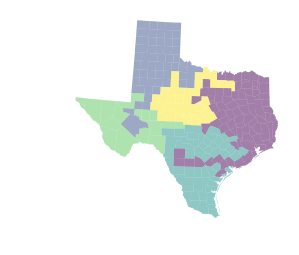

In [18]:
AZP_.plot()

In [19]:
AZP_.constraints[0].satisfied(AZP_._data.groupby('current_labels'))

True